## Frequency of Bucket Spills (Fig-7)

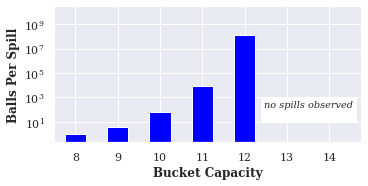

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='12')

df = pd.read_csv("base/Base8.Spills.stat", delimiter='\s+')

# Add Trials/Spill for Extra-Ways=0
id=len(df)+1
df.at[id, 'ExtraWaysPerSkew'] = 0
df.at[id, 'Trials/Spill'] = 1
#print (df)

fig = plt.figure(figsize=(5.5,2.5))
plt.bar(df['ExtraWaysPerSkew']+8, df['Trials/Spill'], align='center', width = 0.5, color='blue')


ax = plt.gca()

#xticks
print()
plt.xticks(df['ExtraWaysPerSkew']+8)
ax.set_xlim(7.5,14.75)

#axes labels
plt.xlabel('Bucket Capacity',weight = 'bold')
plt.ylabel('Balls Per Spill',weight = 'bold')

#Set Y format & limts
ax.set_yscale('log')
ax.set_ylim(0.2,3*10**10)

#grid
ax.axis('on')
#ax.xaxis.grid()

#Text
ax.text(13.5, 10**2, 'no spills observed\n', style='italic',
        bbox={ 'facecolor': 'white','pad': 3}, family='serif',size='9.7',
        ha='center', va='center')

fig.savefig("Fig7.pdf",bbox_inches='tight')

## Bucket Probabilities - Analytical  (Fig-9)

    BallsInBucket-N     Pr_obs(N)     Pr_est(N)
0                 0  4.111750e-06           NaN
1                 1  6.392950e-05  6.578786e-05
2                 2  5.107460e-04  5.262834e-04
3                 3  2.722910e-03  2.805910e-03
4                 4  1.087370e-02  1.120120e-02
5                 5  3.448520e-02  3.552116e-02
6                 6  8.907690e-02  9.165749e-02
7                 7  1.846520e-01  1.894004e-01
8                 8  2.843510e-01  2.892211e-01
9                 9  2.706400e-01  2.695320e-01
10               10  1.116880e-01  1.055835e-01
11               11  1.085090e-02  8.795725e-03
12               12  7.938550e-05  5.157652e-05
13               13  3.000000e-09  1.637008e-09
14               14  0.000000e+00  1.531311e-18
15               15  0.000000e+00  1.250621e-36
16               16  0.000000e+00           NaN


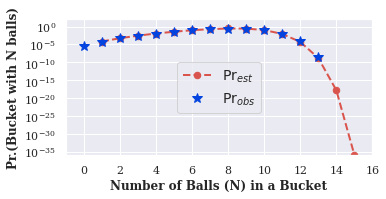

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


##### PROCESS ANALYTICAL RESULTS ########

Pr_df = pd.read_csv("base/Base8.BucketProb.stat", delimiter='\s+')
p_0 = Pr_df['Pr_obs(N)'][0]
Pr_df.at[1,'Pr_est(N)'] = 8*(p_0**2 + 2*p_0 - 2*p_0*p_0)

p_leqN = p_0 + Pr_df.at[1,'Pr_est(N)']
for N in range(1,11):
    p_N = Pr_df.at[N,'Pr_est(N)']
    Pr_df.at[N+1,'Pr_est(N)'] = 8/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr_df.at[N+1,'Pr_est(N)']

for N in range(11,15):
    p_N = Pr_df.at[N,'Pr_est(N)']
    Pr_df.at[N+1,'Pr_est(N)'] = 8/(N+1)*(p_N**2)
    
print (Pr_df)

##### PLOT RESULTS #########

#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='14')

fig = plt.figure(figsize=(5.5,2.5))
ax1 = plt.gca()

#Plot
ax1 = Pr_df.set_index('BallsInBucket-N')['Pr_est(N)'].plot(label='$\Pr_{est}$',color=sns.xkcd_rgb["pale red"],linestyle="--",linewidth=2, marker="o", markersize=6.5)
ax1 = Pr_df.set_index('BallsInBucket-N')['Pr_obs(N)'].plot(ax=ax1,label='$\Pr_{obs}$',color=sns.xkcd_rgb["blue"], marker="*", markersize=10, linewidth=0)

#Get Axes
ax1 = plt.gca()

#legend
legend_properties={'size':14}
ax1.legend(loc='center',prop=legend_properties)


#xticks
ax1.set_xlim(-1,16)

#axes labels
plt.xlabel('Number of Balls (N) in a Bucket',weight='bold')
plt.ylabel('Pr.(Bucket with N balls)',weight = 'bold')

#Set Y format & limts
ax1.set_yscale('log')
ax1.set_ylim(10**-36,100)
ax1.set_yticks([1,10**-5,10**-10,10**-15,10**-20,10**-25,10**-30,10**-35])

#grid
ax1.axis('on')

fig.savefig("Fig9.pdf",bbox_inches='tight',dpi=300)

## Frequency of Bucket Spills - Analytical (Fig-10)

  Bucket_Capacity SpillTries_Obs SpillTries_Est
0               9        3.54277        13.7651
1              10        62.8273        89.7032
2              11        8398.49        12925.8
3              12    1.33333e+08     3.7592e+08
4              13            NaN    3.73163e+17
5              14            NaN    4.26455e+35


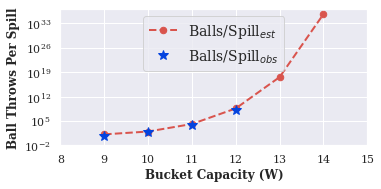

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


##### PROCESS RESULTS ########
# Read Empirical Results
df1 = pd.read_csv("base/Base8.Spills.stat", delimiter='\s+')
#print (df1)
Spill_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Obs','SpillTries_Est'])
for i in range(0,4):
    Spill_df.at[i,'Bucket_Capacity'] = df1.at[i,'ExtraWaysPerSkew'] + 8
    Spill_df.at[i,'SpillTries_Obs'] = df1.at[i,'Trials/Spill']
    
Spill_df.at[4,'Bucket_Capacity'] = Spill_df.at[3,'Bucket_Capacity'] + 1
Spill_df.at[5,'Bucket_Capacity'] = Spill_df.at[4,'Bucket_Capacity'] + 1

# Calculation of Spills from Analytical Probabilities.
for i in range(0,6): 
    Spill_df.at[i,'SpillTries_Est'] = 1/Pr_df.at[Spill_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2

print(Spill_df)

##### PLOT RESULTS ########

#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='14')


fig = plt.figure(figsize=(5.5,2.5))

ax1 = Spill_df.set_index('Bucket_Capacity')['SpillTries_Est'].plot(label='Balls/Spill$_{est}$',color=sns.xkcd_rgb["pale red"],linestyle="--",linewidth=2, marker="o", markersize=6.5)
ax1 = Spill_df.set_index('Bucket_Capacity')['SpillTries_Obs'].plot(ax=ax1,label='Balls/Spill$_{obs}$',color=sns.xkcd_rgb["blue"], marker="*", markersize=10, linewidth=0)

ax1 = plt.gca()

#legend
ax1.legend(loc='upper center',prop={"size":14})

#xticks
ax1.set_xlim(8,15)

#axes labels
plt.xlabel('Bucket Capacity (W)',weight='bold')
plt.ylabel('Ball Throws Per Spill',weight = 'bold')

#Set Y format & limts
ax1.set_yscale('log')
ax1.set_ylim(1e-2,1e37)
#ax1.set_yticks([1.0,10**5,10**10,10**15,10**20,10**25,10**30,10**35])

#grid
#ax1.axis('on')


fig.savefig("Fig10.pdf",bbox_inches='tight')